# Sprint4　機械学習スクラッチ ロジスティック回帰
## 1.このSprintについて
### Sprintの目的
- スクラッチを通してロジスティック回帰を理解する
- 分類問題についての基礎を学ぶ
### どのように学ぶか
スクラッチでロジスティック回帰を実装した後、学習と検証を行なっていきます。

### 2.ロジスティック回帰スクラッチ
ロジスティック回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

以下に雛形を用意してあります。このScratchLogisticRegressionクラスにコードを書き加えていってください。推定関係のメソッドは線形回帰と異なり、ラベルを出力するpredictメソッドと、確率を出力するpredict_probaメソッドの2種類を作成します。

雛形
```
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass


    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """

        pass
        return

    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """

        pass
        return
```

＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題1】仮定関数
ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。

ロジスティック回帰の仮定関数は、線形回帰の仮定関数を シグモイド関数 に通したものです。シグモイド関数は以下の式で表されます。
$$g(z) = \frac{1}{1 + e^{-z}}$$

線形回帰の仮定関数は次の式でした。
$$h(\theta) = \theta^T \cdot x$$

まとめて書くと、ロジスティック回帰の仮定関数は次のようになります。
$$h\theta(x) = \frac{1}{1 + e^{-\theta^T \cdot x}}$$

### 【解答】下記ScratchLogisticRegressionクラス内の_logistic_hypothesis関数に実装

In [11]:
import numpy as np
import math
from sklearn.datasets import load_iris
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from tempfile import TemporaryFile

In [2]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.coef_ = None
        self.λ = 1

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        assert len(np.unique(y)) == 2, "yが2値ではありません"
        self.y = y # ラベルをインスタンス変数に保存
        y = np.where(y==np.unique(self.y)[0], 0, 1) # 学習データのラベルを0 or 1の値に変換
        y_val = np.where(y_val==np.unique(self.y)[0], 0, 1) # 検証データのラベルを0 or 1の値に変換
                
        X_one = np.c_[np.ones(X.shape[0]), X] # 学習用のx0に1の列を追加
        X_val_one = np.c_[np.ones(X_val.shape[0]), X_val] # 検証用のx0に1の列を追加
                
        self.coef_ = np.random.RandomState(0).rand(X_one.shape[1]) # θの初期値をランダムに設定
        
        if self.no_bias:
            # no_biasをTrueにした場合はθ0に０を代入
            self.coef_[0] = 0
                       
        for i in range(self.iter):
            y_pred = self._logistic_hypothesis(X_one) 
            y_val_pred = self._logistic_hypothesis(X_val_one)
            error = y_pred - y
            val_error = y_val_pred - y_val
                        
            self.loss[i] = self._get_loss(y_pred, y)
            self.val_loss[i] = self._get_loss(y_val_pred, y_val)
            
            self._gradient_descent(X_one, error)
        
        print("θ:{}".format(self.coef_))
        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print("loss\n{}\n".format(self.loss))
            print("val_loss\n{}".format(self.val_loss))

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        y_pred = self.predict_proba(X)       
        
        for i in range(len(y_pred)):
            assert y_pred[i] >= 0 and y_pred[i] <= 1, "範囲外です"
            if y_pred[i] <= 0.5:
                y_pred[i] = 0   
            else:
                y_pred[i] = 1
        
        y_pred = np.where(y_pred.astype(int)==0, np.unique(self.y)[0], np.unique(self.y)[1]) # 入力時の2値を0,1に再変換
        return y_pred

    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        X_one = np.c_[np.ones(X.shape[0]), X]
        y_pred = self._logistic_hypothesis(X_one)
        return y_pred
    
    def _logistic_hypothesis(self, X):
        """
        ロジスティック回帰の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        y_pred = 1 / (1 + math.e ** (-1 * (X@self.coef_)))
        return y_pred
        
    def _gradient_descent(self, X, error):
        self.coef_ = self.coef_ - self.lr*(1/np.shape(X)[0]*(X.T@error) + self.λ/np.shape(X)[0]*np.r_[np.array([0]), self.coef_[1:]])
        
    def _get_loss(self, y_pred, y):
        loss = 1/len(y)*sum((y*-1*np.log(y_pred) - (1-y)*np.log(1-y_pred))) + self.λ/(2*len(y))*sum(self.coef_**2)
        return loss

＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。
$$\theta_j := \theta_j - \alpha\frac{\partial J(\theta)}{\partial\theta_j}$$
$$\frac{\partial J(\theta)}{\partial\theta_0} = \frac{1}{m}\sum_{i=1}^m\left(h_\theta(x^{(i)} - y^{(i)})x^{(i)}_j\right) , j = 0$$
$$\frac{\partial J(\theta)}{\partial\theta_j} = \left(\frac{1}{m}\sum_{i=1}^m\left(h_\theta(x^{(i)} - y^{(i)})x^{(i)}_j\right)\right) + \frac{\lambda}{m}\theta_j , j \geq 1$$

$\alpha$ : 学習率

$i$ : サンプルのインデックス

$j$ : 特徴量のインデックス

$m$ : 入力されるデータの数

$h_\theta()$ : 仮定関数

$x$ : 特徴量ベクトル

$\theta$ : パラメータ（重み）ベクトル

$x^{(i)}$ : i番目のサンプルの特徴量ベクトル

$y^{(i)}$ : i番目のサンプルの正解ラベル

$\theta_j$ : j番目のパラメータ（重み）

$\lambda$ : 正則化パラメータ

### 【解答】上記ScratchLogisticRegressionクラス内に実装

### 【問題3】推定
推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。

仮定関数 
$h_\theta(x)$の出力がpredict_probaの返り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの返り値となります。

### 【解答】上記ScratchLogisticRegressionクラス内に実装

＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題4】目的関数
以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。

なお、この数式には正則化項が含まれています。

＊数式が見切れる場合、DIVERを全画面にして御覧ください。
$$J(\theta) = \frac{1}{m}\sum_{i=1}^m\left[-y^{(i)}\log\left(h_\theta(x^{(i)})\right) - h_\theta(x^{(i)}) \log(1 - h_\theta\left(x{(i)}\right)\right] + \frac{\lambda}{2m}\sum_{j=1}^n\theta_j^2$$

$m$ : 入力されるデータの数

$h_\theta()$ : 仮定関数

$x$ : 特徴量ベクトル

$\theta$ : パラメータ（重み）ベクトル

$x^{(i)}$ : i番目のサンプルの特徴量ベクトル

$y^{(i)}$ : i番目のサンプルの正解ラベル

$\theta_j$ : j番目のパラメータ（重み）

$n$ : 特徴量の数

$\lambda$ : 正則化パラメータ

### 【解答】上記ScratchLogisticRegressionクラス内に実装

## 3.検証
＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [3]:
# X, yを分割する関数
def scratch_train_test_split(X, y, train_size=0.8,):
    assert isinstance(X, np.ndarray) and isinstance(y, np.ndarray), 'Xとyの型はndarrayにしてください' # X,yがndarray型でない場合はエラーを発生させる
    assert X.shape[0] == len(y), 'Xの行数とyの列数がそろっていません。\nXの列数：{} \nyの行数：{}'.format(X.shape[0], len(y)) # X,yの行列数が合っていない場合ははエラーを発生させる
    np.random.seed(0) # 再現性を保つためシードを固定
    permutation = np.random.permutation(len(y)) # X, yをシャッフルする乱数を作成
    x_shuffle = X[permutation] # Xをシャッフルさせる
    y_shuffle = y[permutation] # yをシャッフルさせる
    num = round(len(y) * train_size) # 分割点を取得
    
    X_train = x_shuffle[:][:num] # Xを分割しX_trainを作成
    X_test = x_shuffle[:][num:] # 分割したXの残りでX_testを作成
    y_train = y_shuffle[:num] # yを分割しy_trainを作成
    y_test = y_shuffle[num:] # 分割したyの残りでy_testを作成
    
    return X_train, X_test, y_train, y_test

In [4]:
# アイリスデータセットで推定
iris_dataset = load_iris()
X = iris_dataset['data'][50:, 2:]
y = iris_dataset['target'][50:]
X = (X - np.mean(X)) / np.std(X)

X_train, X_test, y_train, y_test = scratch_train_test_split(X, y)

num_iter = 1000
lr = 0.01
no_bias = False
verbose = False
log = ScratchLogisticRegression(num_iter, lr, no_bias, verbose)
log.fit(X_train, y_train, X_test, y_test)
y_pred = log.predict(X_test)
y_pred_proba = log.predict_proba(X_test)
print(y_pred)
print(y_test)
print(y_pred_proba)

θ:[0.16797842 1.32818731 1.45018722]
[1 1 2 1 1 2 2 1 2 2 2 1 1 2 1 2 2 2 1 1]
[1 1 2 1 1 2 2 1 2 2 2 1 1 2 1 2 2 2 1 1]
[0.36339716 0.34436702 0.81208598 0.31080165 0.27911511 0.70572413
 0.69840026 0.23172689 0.51931203 0.76488825 0.64816206 0.4381473
 0.27911511 0.51406565 0.28052637 0.57762007 0.86516055 0.6911432
 0.32736355 0.31080165]


In [5]:
# 評価指標を計算する関数
def evaluate(y_true, y_pred, label=1):
    """
    2値分類の評価指標を計算する
    """
    acc = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, pos_label=label)
    recall = metrics.recall_score(y_test, y_pred, pos_label=label)
    f1 = metrics.f1_score(y_test, y_pred, pos_label=label)
    confusion = metrics.confusion_matrix(y_test, y_pred)
    return acc, precision, recall, f1, confusion

print("acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}".format(*evaluate(y_test, y_pred)))

acc : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
confusion matrix 
 [[10  0]
 [ 0 10]]


＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題7】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。

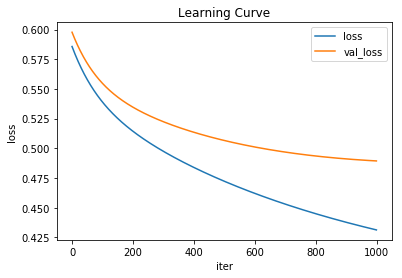

In [6]:
# 学習曲線を描画
plt.title("Learning Curve")
plt.xlabel("iter")
plt.ylabel("loss")
plt.plot(np.arange(num_iter), log.loss, label="loss")
plt.plot(np.arange(num_iter), log.val_loss, label="val_loss")
plt.legend()
plt.show()

＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題8】決定領域の可視化
決定領域を可視化してください。

In [7]:
# グラフを描画する関数
def decision_region(X, y, model, step=0.01, title="decision region' Logistic Regression",
                    feature_names=[None, None], target_names=[None, None]):
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step),
                                    np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(feature_names[0][:-4])
    plt.ylabel(feature_names[1][:-4])
    y_pred = np.where(y_pred==np.unique(y_pred)[0], 0, 1)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

θ:[-0.05435106  0.56814777  0.96646351]
y_pred:[2 1 2 1 1 2 2 1 2 2 2 2 2 2 1 1 2 1 2 1]
y_test:[1 1 2 1 1 2 2 1 2 2 2 1 1 2 1 2 2 2 1 1]

acc : 0.70
precision : 0.75
recall : 0.60
f1 : 0.67
confusion matrix 
 [[6 4]
 [2 8]]


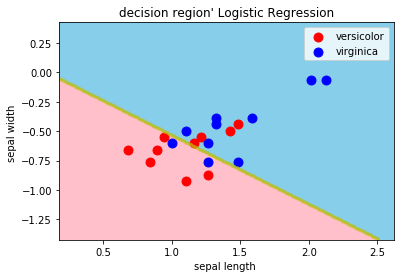

θ:[-0.48418464  0.00748738  1.25217791]
y_pred:[1 1 2 1 1 2 2 1 2 2 2 2 1 2 1 2 2 2 1 1]
y_test:[1 1 2 1 1 2 2 1 2 2 2 1 1 2 1 2 2 2 1 1]

acc : 0.95
precision : 1.00
recall : 0.90
f1 : 0.95
confusion matrix 
 [[ 9  1]
 [ 0 10]]


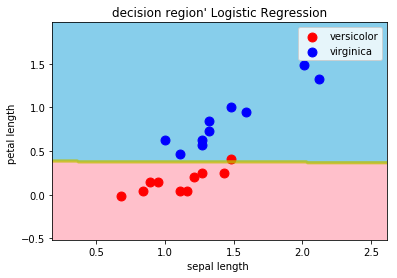

θ:[0.40867118 0.96133034 1.34928307]
y_pred:[1 1 2 1 1 2 2 1 1 2 2 2 1 1 1 2 2 2 1 1]
y_test:[1 1 2 1 1 2 2 1 2 2 2 1 1 2 1 2 2 2 1 1]

acc : 0.85
precision : 0.82
recall : 0.90
f1 : 0.86
confusion matrix 
 [[9 1]
 [2 8]]


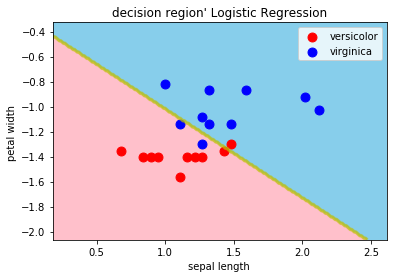

θ:[-0.006268    1.00118216  1.37506834]
y_pred:[1 1 2 1 1 2 2 1 2 2 2 2 1 2 1 2 2 2 1 1]
y_test:[1 1 2 1 1 2 2 1 2 2 2 1 1 2 1 2 2 2 1 1]

acc : 0.95
precision : 1.00
recall : 0.90
f1 : 0.95
confusion matrix 
 [[ 9  1]
 [ 0 10]]


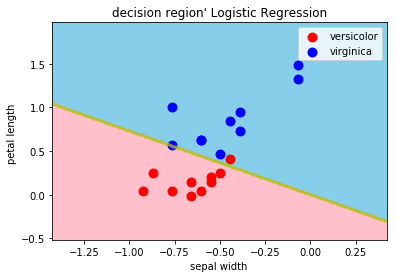

θ:[1.05338656 0.50688683 0.750556  ]
y_pred:[1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 2 2 1 1]
y_test:[1 1 2 1 1 2 2 1 2 2 2 1 1 2 1 2 2 2 1 1]

acc : 0.75
precision : 0.67
recall : 1.00
f1 : 0.80
confusion matrix 
 [[10  0]
 [ 5  5]]


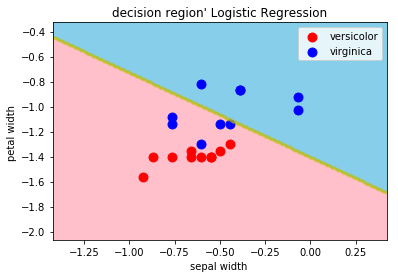

θ:[0.513955   1.57080368 1.13312963]
y_pred:[1 1 2 1 1 2 2 1 1 2 2 1 1 2 1 2 2 2 1 1]
y_test:[1 1 2 1 1 2 2 1 2 2 2 1 1 2 1 2 2 2 1 1]

acc : 0.95
precision : 0.91
recall : 1.00
f1 : 0.95
confusion matrix 
 [[10  0]
 [ 1  9]]


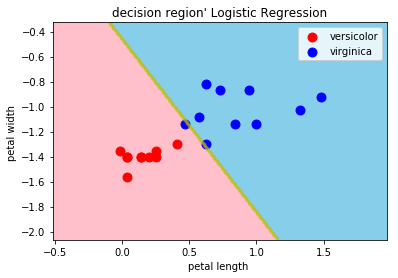

In [8]:
num_iter = 1000
lr = 0.01
no_bias = False
verbose = False
iris_dataset = load_iris()

X = iris_dataset['data'][50:, :]
y = iris_dataset['target'][50:]

X = (X - np.mean(X)) / np.std(X) # Xを標準化
X_train, X_test, y_train, y_test = scratch_train_test_split(X, y) # X, yを分割

X_columns = iris_dataset['feature_names'] 
target_names = iris_dataset['target_names'][1:]

combi_list = []

for i in range(len(X_columns)):
    for j in range(len(X_columns)):
        combi = [X_columns[i], X_columns[j]]
        if combi[0] == combi[1]:
            continue
        else:
            if [combi[1], combi[0]] in combi_list:
                continue
            else:
                combi_list.append(combi)
                X_train_temp = np.c_[X_train[:, i], X_train[:, j]]
                X_test_temp = np.c_[X_test[:, i], X_test[:, j]]

                log = ScratchLogisticRegression(num_iter, lr, no_bias, verbose)
                log.fit(X_train_temp, y_train, X_test_temp, y_test)
                y_pred = log.predict(X_test_temp)
                print("y_pred:{}".format(y_pred))
                y_pred_proba = log.predict_proba(X_test_temp)
                print("y_test:{}\n".format(y_test))
                print("acc : {:.2f}\nprecision : {:.2f}\nrecall : {:.2f}\nf1 : {:.2f}\nconfusion matrix \n {}"
                      .format(*evaluate(y_test, y_pred)))
                decision_region(X_test_temp, y_test, log, feature_names=combi, target_names=target_names)

#### 2値が整数の場合以外でも推定してみた(A,Bの場合)

θ:[-0.05435106  0.56814777  0.96646351]
y_pred:['B' 'A' 'B' 'A' 'A' 'B' 'B' 'A' 'B' 'B' 'B' 'B' 'B' 'B' 'A' 'A' 'B' 'A'
 'B' 'A']
y_test:['A' 'A' 'B' 'A' 'A' 'B' 'B' 'A' 'B' 'B' 'B' 'A' 'A' 'B' 'A' 'B' 'B' 'B'
 'A' 'A']

acc : 0.70
precision : 0.75
recall : 0.60
f1 : 0.67
confusion matrix 
 [[6 4]
 [2 8]]


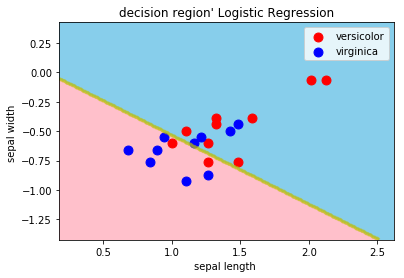

θ:[-0.48418464  0.00748738  1.25217791]
y_pred:['A' 'A' 'B' 'A' 'A' 'B' 'B' 'A' 'B' 'B' 'B' 'B' 'A' 'B' 'A' 'B' 'B' 'B'
 'A' 'A']
y_test:['A' 'A' 'B' 'A' 'A' 'B' 'B' 'A' 'B' 'B' 'B' 'A' 'A' 'B' 'A' 'B' 'B' 'B'
 'A' 'A']

acc : 0.95
precision : 1.00
recall : 0.90
f1 : 0.95
confusion matrix 
 [[ 9  1]
 [ 0 10]]


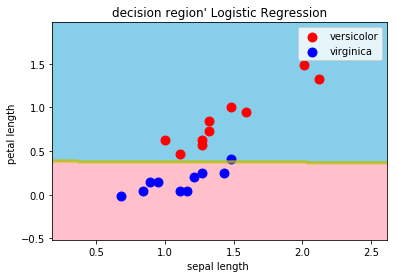

θ:[0.40867118 0.96133034 1.34928307]
y_pred:['A' 'A' 'B' 'A' 'A' 'B' 'B' 'A' 'A' 'B' 'B' 'B' 'A' 'A' 'A' 'B' 'B' 'B'
 'A' 'A']
y_test:['A' 'A' 'B' 'A' 'A' 'B' 'B' 'A' 'B' 'B' 'B' 'A' 'A' 'B' 'A' 'B' 'B' 'B'
 'A' 'A']

acc : 0.85
precision : 0.82
recall : 0.90
f1 : 0.86
confusion matrix 
 [[9 1]
 [2 8]]


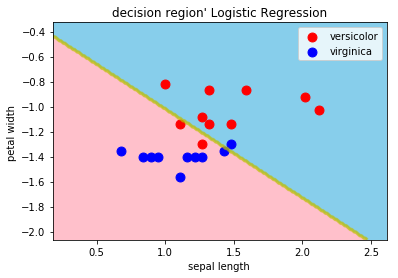

θ:[-0.006268    1.00118216  1.37506834]
y_pred:['A' 'A' 'B' 'A' 'A' 'B' 'B' 'A' 'B' 'B' 'B' 'B' 'A' 'B' 'A' 'B' 'B' 'B'
 'A' 'A']
y_test:['A' 'A' 'B' 'A' 'A' 'B' 'B' 'A' 'B' 'B' 'B' 'A' 'A' 'B' 'A' 'B' 'B' 'B'
 'A' 'A']

acc : 0.95
precision : 1.00
recall : 0.90
f1 : 0.95
confusion matrix 
 [[ 9  1]
 [ 0 10]]


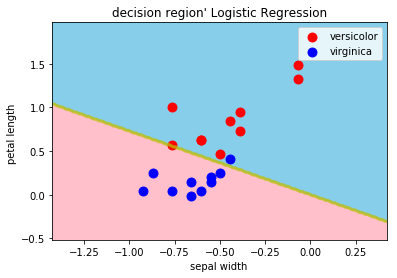

θ:[1.05338656 0.50688683 0.750556  ]
y_pred:['A' 'A' 'B' 'A' 'A' 'B' 'A' 'A' 'A' 'B' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'B'
 'A' 'A']
y_test:['A' 'A' 'B' 'A' 'A' 'B' 'B' 'A' 'B' 'B' 'B' 'A' 'A' 'B' 'A' 'B' 'B' 'B'
 'A' 'A']

acc : 0.75
precision : 0.67
recall : 1.00
f1 : 0.80
confusion matrix 
 [[10  0]
 [ 5  5]]


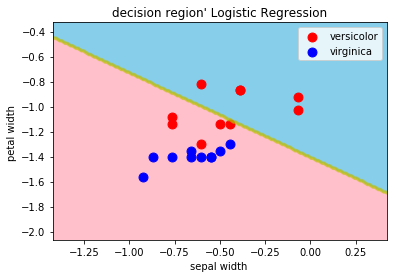

θ:[0.513955   1.57080368 1.13312963]
y_pred:['A' 'A' 'B' 'A' 'A' 'B' 'B' 'A' 'A' 'B' 'B' 'A' 'A' 'B' 'A' 'B' 'B' 'B'
 'A' 'A']
y_test:['A' 'A' 'B' 'A' 'A' 'B' 'B' 'A' 'B' 'B' 'B' 'A' 'A' 'B' 'A' 'B' 'B' 'B'
 'A' 'A']

acc : 0.95
precision : 0.91
recall : 1.00
f1 : 0.95
confusion matrix 
 [[10  0]
 [ 1  9]]


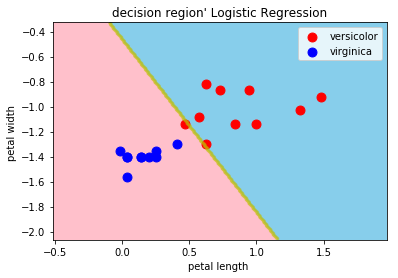

In [9]:
num_iter = 1000
lr = 0.01
no_bias = False
verbose = False
iris_dataset = load_iris()

X = iris_dataset['data'][50:, :]
y = iris_dataset['target'][50:]
y = np.where(y==np.unique(y)[0], "A", "B") # ラベルをA, Bに変換

X = (X - np.mean(X)) / np.std(X) # Xを標準化
X_train, X_test, y_train, y_test = scratch_train_test_split(X, y) # X, yを分割

X_columns = iris_dataset['feature_names'] 
target_names = iris_dataset['target_names'][1:]

combi_list = []

for i in range(len(X_columns)):
    for j in range(len(X_columns)):
        combi = [X_columns[i], X_columns[j]]
        if combi[0] == combi[1]:
            continue
        else:
            if [combi[1], combi[0]] in combi_list:
                continue
            else:
                combi_list.append(combi)
                X_train_temp = np.c_[X_train[:, i], X_train[:, j]]
                X_test_temp = np.c_[X_test[:, i], X_test[:, j]]

                log = ScratchLogisticRegression(num_iter, lr, no_bias, verbose)
                log.fit(X_train_temp, y_train, X_test_temp, y_test)
                y_pred = log.predict(X_test_temp)
                print("y_pred:{}".format(y_pred))
                y_pred_proba = log.predict_proba(X_test_temp)
                print("y_test:{}\n".format(y_test))
                print("acc : {:.2f}\nprecision : {:.2f}\nrecall : {:.2f}\nf1 : {:.2f}\nconfusion matrix \n {}"
                      .format(*evaluate(y_test, y_pred, np.unique(y)[0])))
                decision_region(X_test_temp, y_test, log, feature_names=combi, target_names=target_names)

＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題9】（アドバンス課題）重みの保存
検証が容易になるように、学習した重みを保存および読み込みができるようにしましょう。pickleモジュールやNumPyのnp.savezを利用します。

[pickle — Python オブジェクトの直列化 — Python 3.7.4 ドキュメント](https://docs.python.org/ja/3/library/pickle.html)

[numpy.savez — NumPy v1.17 Manual](https://docs.scipy.org/doc/numpy/reference/generated/numpy.savez.html)

In [10]:
np.save('sprint4_theta.npy', log.coef_)
print(np.load('sprint4_theta.npy'))

[0.513955   1.57080368 1.13312963]
